In [3]:
import pickle
from keras.utils import np_utils
from sklearn.utils import shuffle

#import du lieu
with open('traicay.pickle', 'rb') as f:
  (x, y) = pickle.load(f)

# chia du lieu train
x_train = x[:4000]
y_train = y[:4000]

# ep kieu
x_train = x_train.astype('float32')
x_train /= 255
#encoding
y_train = np_utils.to_categorical(y_train, 10)
x_train, y_train = shuffle(x_train, y_train)
print(x_train.shape, y_train.shape)

(4000, 150, 150, 3) (4000, 10)


In [41]:
# tao model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers.pooling import MaxPooling2D
model = Sequential()
model.add(Conv2D(32, (3,3), kernel_initializer= 'he_uniform', padding = 'same', input_shape= (150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform', padding= 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), kernel_initializer= 'he_uniform', padding= 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation= 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(128, activation= 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(128, activation= 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(10, activation= 'softmax'))
model.summary()
opt = SGD(lr = 0.01, momentum= 0.9)

#compile & train model
model.compile(optimizer= opt, loss= 'binary_crossentropy', metrics= 'accuracy')
history = model.fit(x_train, y_train, batch_size= 1024, epochs= 30, validation_split= 0.2)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 18, 18, 128)     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/30
4/4 [==============================] - 3s 616ms/step - loss: 0.7293 - accuracy: 0.1319 - val_loss: 3.1729 - val_accuracy: 0.1275
Epoch 2/30
4/4 [==============================] - 2s 551ms/step - loss: 2.4788 - accuracy: 0.1634 - val_loss: 1.6686 - val_accuracy: 0.0000e+00
Epoch 3/30
4/4 [==============================] - 2s 556ms/step - loss: 1.1844 - accuracy: 0.0491 - val_loss: 0.5839 - val_accuracy: 0.0950
Epoch 4/30
4/4 [==============================] - 2s 554ms/step - loss: 0.5515 - accuracy: 0.1247 - val_loss: 0.4186 - val_accuracy: 0.1825
Epoch 5/30
4/4 [==============================] - 2s 553ms/step - loss: 0.3896 - accuracy: 0.1859 - val_loss: 0.2947 - val_accuracy: 0.1713
Epoch 6/30
4/4 [==============================] - 2s 552ms/step - loss: 0.2845 - accuracy: 0.3194 - val_loss: 0.2466 - val_accuracy: 0.5450
Epoch 7/30
4/4 [==============================] - 2s 554ms/step - loss: 0.2282 - accuracy: 0.5403 - val_loss: 0.1807 - val_accuracy: 0.6913
Epoch 8/30
4/4 [

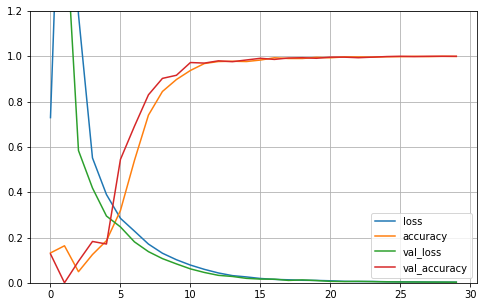

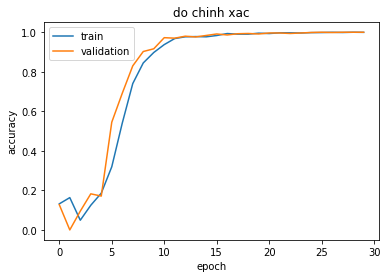

In [45]:
#ve do thi 
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1.2)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('do chinh xac')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

Day la Avocado
1


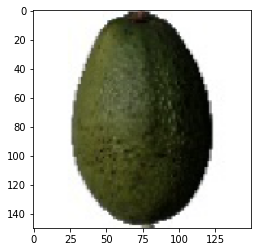

Day la Cherry
4


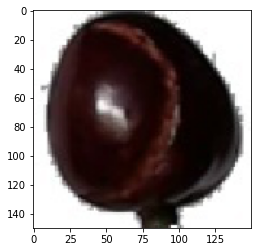

Day la Banana
2


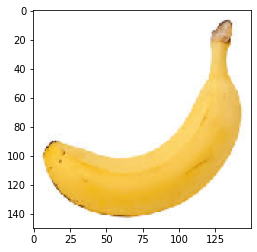

In [49]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
label = ['Apple', 'Avocado', 'Banana', 'Cactus', 'Cherry', 'Coconut', 'Guava', 'Lemon', 'Lychee', 'Mango']
def predict(image):
  img = load_img(f'{image}.jfif', target_size = (150, 150))
  plt.imshow(img)
  img = img_to_array(img)
  img = img.reshape(1, 150, 150, 3)
  img = img.astype('float32')
  img /= 255
  
  pred = int(np.argmax(model.predict(img), axis = 1))
  for i in range(10):
    if i == pred:
      print(f'Day la {label[i]}')
  print(pred)
  plt.show()
predict('bo')
predict('cherry')
predict('banana')

In [47]:
from google.colab import files
upload = files.upload()

Saving oi.jfif to oi.jfif
